# EDA of Dataset


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data/feedback_results.csv")
df["query_length"] = df["query"].apply(len)
df["feedback_length"] = df["feedback"].apply(len)
df.head()

,feedback,query,query_t,feedback_local,feedback_local_time,feedback_local_c_tokens,feedback_local_p_tokens,feedback_web,feedback_web_time,feedback_web_c_tokens,feedback_web_p_tokens,query_length,feedback_length
0,Clarity and Respect: The communication could h...,How to communicate with employees in a profess...,3.455118,Enhancing Professionalism and Respect in Commu...,7.974918,189,2951,Enhancing Professional Communication and Respe...,12.577793,166,2961,73,223
1,Clarity and Respect: The communication could h...,How to communicate with employees in a profess...,1.926185,Enhancing Professionalism and Respect in Commu...,7.883796,192,2951,Enhancing Professional Communication and Respe...,13.009650,167,2958,73,223
2,Consideration and Context: It would be helpful...,How to effectively provide context and explain...,1.043000,Providing Context and Explaining Reasons Behin...,8.090895,192,2904,Consideration and Context in Leadership Commun...,17.359145,208,2955,80,226
3,Express Empathy: Starting the conversation wit...,how to express empathy in leadership communica...,1.673025,Expressing Empathy in Leadership Communication...,8.505779,165,2752,Enhancing Empathy in Leadership Communication:...,14.925500,211,2924,50,252
4,Provide Context: It's important to provide con...,How to effectively provide context and explain...,1.833553,Provide Context and Importance: When making a ...,30.844002,238,2919,Provide Context and Importance: When making a ...,17.712837,265,2951,98,279


Text(0.5, 1.0, 'Feedback Generation Correlation Matrix')

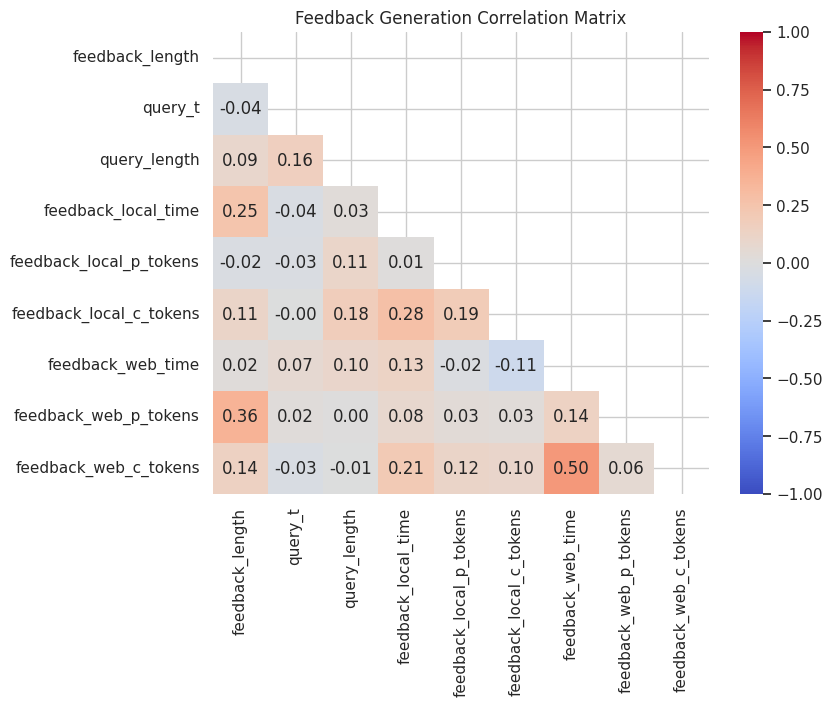

In [3]:
corr = df[
    [
        "feedback_length",
        "query_t",
        "query_length",
        "feedback_local_time",
        "feedback_local_p_tokens",
        "feedback_local_c_tokens",
        "feedback_web_time",
        "feedback_web_p_tokens",
        "feedback_web_c_tokens",
    ]
].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set_theme(rc={'figure.figsize':(8,6)}, style='whitegrid', palette='hls')
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", vmax=1, vmin=-1)
plt.title('Feedback Generation Correlation Matrix')

In [4]:
print(f'Average Query Time: {df["query_t"].mean()} +/- {df["query_t"].std()}')
print(f'Median Query Time: {df["query_t"].median()}')

Average Query Time: 1.342220272620519 +/- 0.5875835318632016
Median Query Time: 1.1773878335952759


Text(0.5, 1.0, 'Query Time')

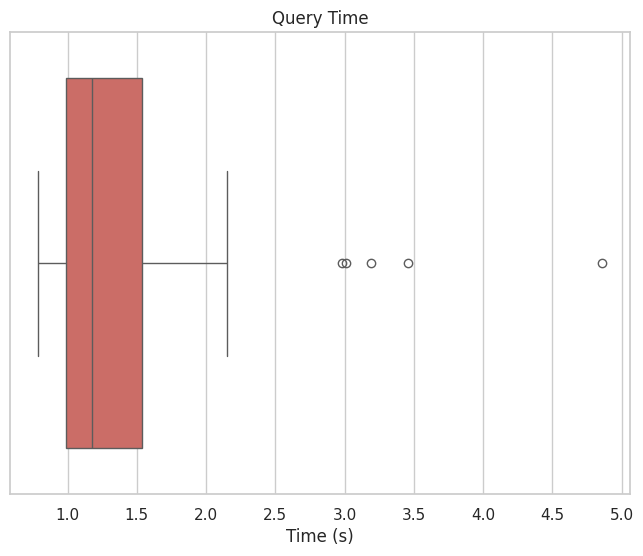

In [5]:
sns.set_theme(rc={'figure.figsize':(8,6)}, style='whitegrid', palette='hls')
sns.boxplot(x=df["query_t"])
plt.xlabel('Time (s)')
plt.title('Query Time')

In [6]:
print(f'Average Local Rag Time: {df['feedback_local_time'].mean()} +/- {df['feedback_local_time'].std()}')
print(f'Median Local Rag Time: {df['feedback_local_time'].median()}')

Average Local Rag Time: 10.022286874055862 +/- 9.297900445459227
Median Local Rag Time: 8.463911414146423


In [7]:
df[df["feedback_local_time"] >= 20]["feedback_local_time"]

4       30.844002
37      33.410960
105    102.594244
Name: feedback_local_time, dtype: float64

Text(0.5, 1.0, 'Local RAG Time')

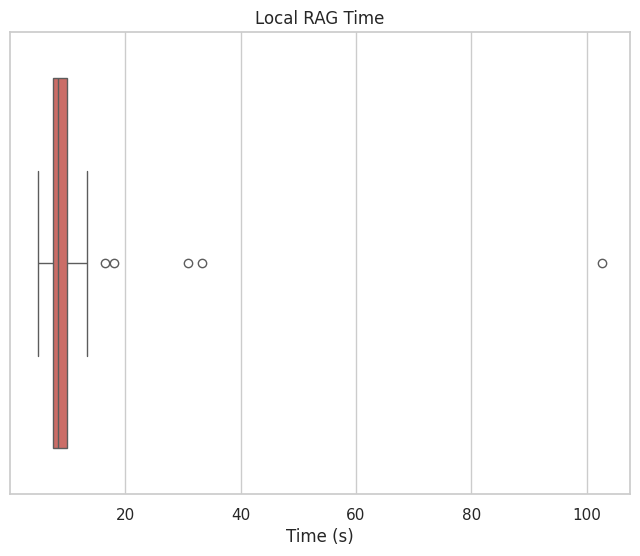

In [8]:
sns.set_theme(rc={'figure.figsize':(8,6)}, style='whitegrid', palette='hls')
sns.boxplot(x=df["feedback_local_time"])
plt.xlabel('Time (s)')
plt.title('Local RAG Time')

Text(0.5, 1.0, 'Local RAG Time')

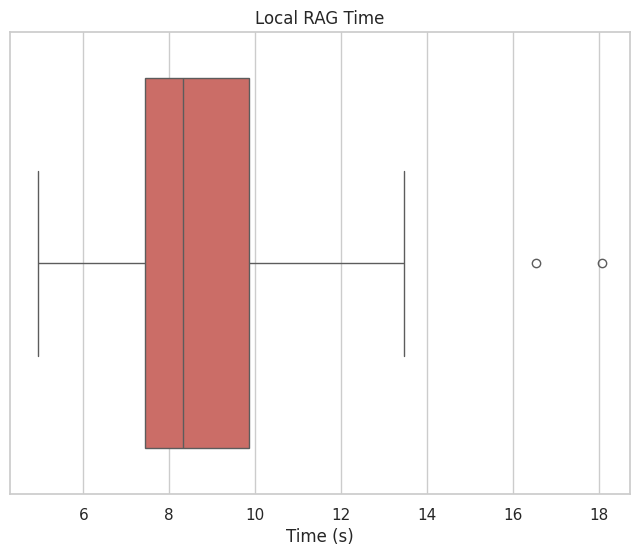

In [9]:
sns.set_theme(rc={'figure.figsize':(8,6)}, style='whitegrid', palette='hls')
sns.boxplot(x=df[df["feedback_local_time"] < 20]["feedback_local_time"])
plt.xlabel('Time (s)')
plt.title('Local RAG Time')

Text(0.5, 1.0, 'Local RAG Time')

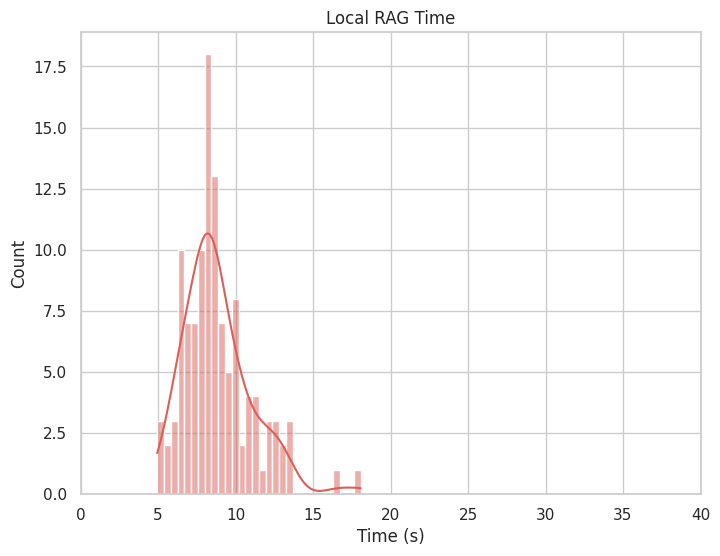

In [10]:
sns.set_theme(rc={'figure.figsize':(8,6)}, style='whitegrid', palette='hls')
sns.histplot(
    df[df["feedback_local_time"] < 20]["feedback_local_time"], bins=30, kde=True
)
plt.xlim(0, 40)
plt.xlabel('Time (s)')
plt.title('Local RAG Time')

In [11]:
print(f'Average Local Rag Time: {df[df['feedback_local_time'] < 20]['feedback_local_time'].mean()} +/- {df[df['feedback_local_time'] < 20]['feedback_local_time'].std()}')
print(f'Median Local Rag Time: {df[df['feedback_local_time'] < 20]['feedback_local_time'].median()}')

Average Local Rag Time: 8.85320699113047 +/- 2.2314614478813932
Median Local Rag Time: 8.329199314117432


Text(0.5, 1.0, 'Local RAG Prompt Tokens')

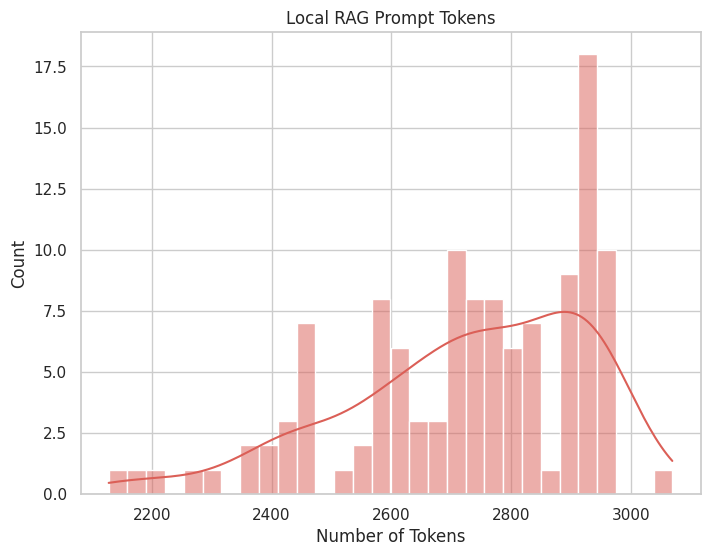

In [12]:
sns.set_theme(rc={'figure.figsize':(8,6)}, style='whitegrid', palette='hls')
sns.histplot(df["feedback_local_p_tokens"], bins=30, kde=True)
plt.xlabel('Number of Tokens')
plt.title('Local RAG Prompt Tokens')

Text(0.5, 1.0, 'Local RAG Completion Tokens')

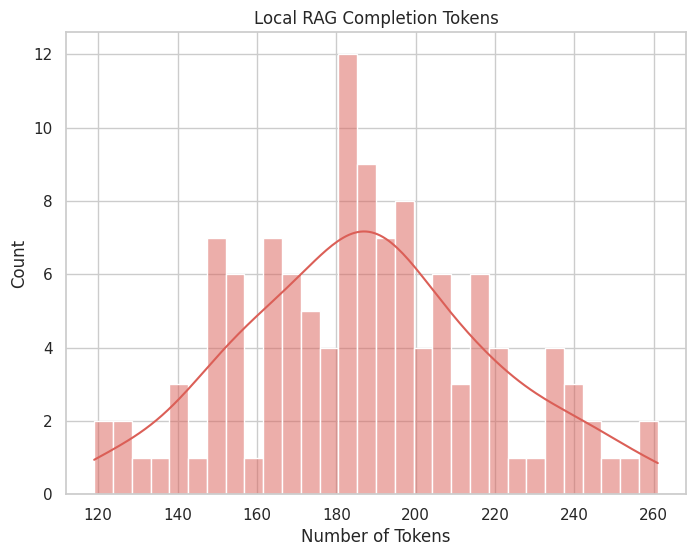

In [13]:
sns.set_theme(rc={'figure.figsize':(8,6)}, style='whitegrid', palette='hls')
sns.histplot(df["feedback_local_c_tokens"], bins=30, kde=True)
plt.xlabel('Number of Tokens')
plt.title('Local RAG Completion Tokens')

In [14]:
print(f'Average Web Rag Time: {df['feedback_web_time'].mean()} +/- {df['feedback_web_time'].std()}')
print(f'Median Web Rag Time: {df['feedback_web_time'].median()}')

Average Web Rag Time: 17.87146568695704 +/- 4.25365351719578
Median Web Rag Time: 17.5116308927536


Text(0.5, 1.0, 'Web RAG Time')

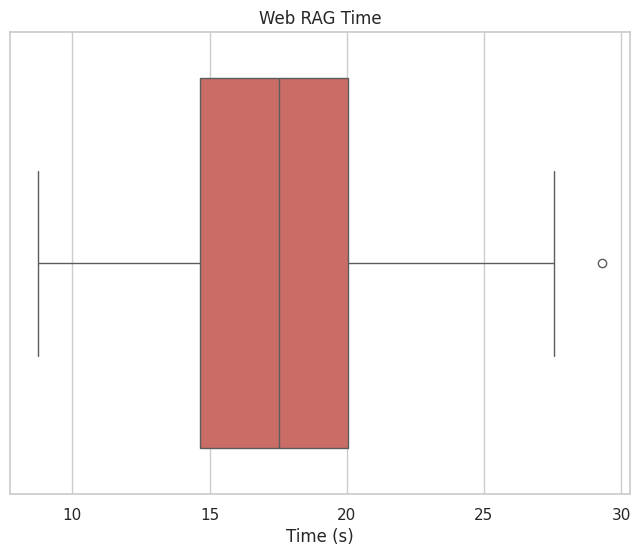

In [15]:
sns.set_theme(rc={'figure.figsize':(8,6)}, style='whitegrid', palette='hls')
sns.boxplot(x=df["feedback_web_time"])
plt.xlabel('Time (s)')
plt.title('Web RAG Time')

Text(0.5, 1.0, 'Web RAG Time')

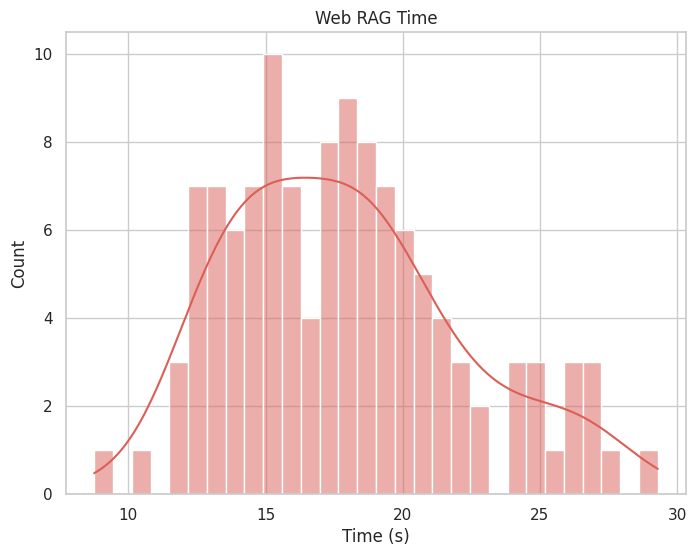

In [16]:
sns.set_theme(rc={'figure.figsize':(8,6)}, style='whitegrid', palette='hls')
sns.histplot(df["feedback_web_time"], bins=30, kde=True)
plt.xlabel('Time (s)')
plt.title('Web RAG Time')

## Duplicate Checking


In [17]:
df = pd.read_csv("data/feedback_results.csv")
df = df[["feedback", "feedback_local", "feedback_web"]].rename(
    columns={"feedback": "none", "feedback_local": "local", "feedback_web": "web"}
)
df

,none,local,web
0,Clarity and Respect: The communication could h...,Enhancing Professionalism and Respect in Commu...,Enhancing Professional Communication and Respe...
1,Clarity and Respect: The communication could h...,Enhancing Professionalism and Respect in Commu...,Enhancing Professional Communication and Respe...
2,Consideration and Context: It would be helpful...,Providing Context and Explaining Reasons Behin...,Consideration and Context in Leadership Commun...
3,Express Empathy: Starting the conversation wit...,Expressing Empathy in Leadership Communication...,Enhancing Empathy in Leadership Communication:...
4,Provide Context: It's important to provide con...,Provide Context and Importance: When making a ...,Provide Context and Importance: When making a ...
...,...,...,...
115,Avoiding Assumptions: The statement made an as...,Enhancing Open Communication and Avoiding Assu...,Avoiding Assumptions and Engaging in Open Comm...
116,Avoid Potentially Judgmental Phrasing: The phr...,Avoiding Judgmental Phrasing While Providing E...,Avoid Potentially Judgmental Phrasing: When pr...
117,Emphasize Collaborative Problem-Solving: While...,Emphasize Collaborative Problem-Solving: To fo...,Emphasize Collaborative Problem-Solving: To en...
118,Express Support for Employee Needs: Expressing...,Enhancing Support for Employee Needs: To bette...,Enhancing Support for Employee Needs: To bette...


In [18]:
print(f'None duplicates: {df.duplicated('none').sum()}')
print(f'Local duplicates: {df.duplicated('local').sum()}')
print(f'Web duplicates: {df.duplicated('web').sum()}')

None duplicates: 1
Local duplicates: 0
Web duplicates: 6


---

# Simulations and Power Analysis

## Simulate Sampling

In [19]:
x = df.sample(1, replace=True, axis=0)
x = x.sample(2, replace=False, axis=1)

In [20]:
samples = []
for i in range(200):
    x = df.sample(1, replace=True, axis=0)
    x = x.sample(2, replace=False, axis=1)
    samples += list(x.columns)

Text(0.5, 1.0, 'Feedback RAG Method')

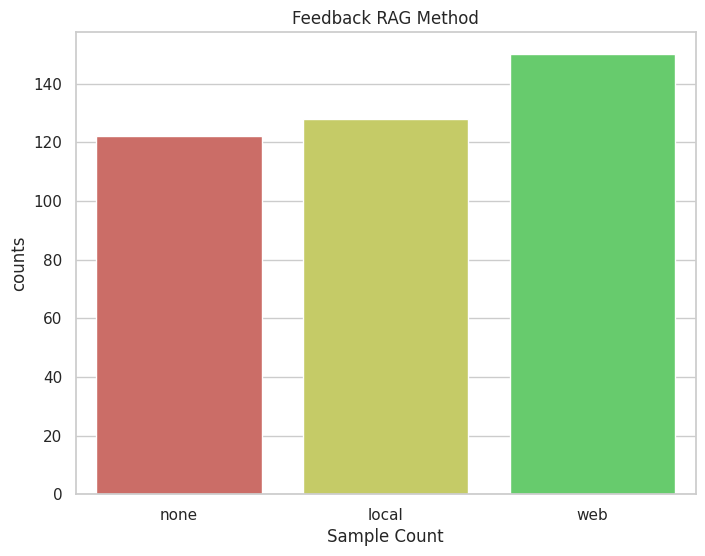

In [21]:
sns.set_theme(rc={'figure.figsize':(8,6)}, style='whitegrid', palette='hls')
counts = pd.DataFrame(samples, columns=["count"])["count"].value_counts()
counts.name = 'counts'
counts = counts.reset_index()
counts.columns = ['method', 'counts']
sns.barplot(counts, x='method', y='counts', hue='method', order=['none', 'local', 'web'], hue_order=['none', 'local', 'web'])
plt.xlabel('Sample Count')
plt.title('Feedback RAG Method')

In [22]:
from collections import defaultdict

battles = defaultdict(int)
for i in range(200):
    x = df.sample(1, replace=True, axis=0)
    x = x.sample(2, replace=False, axis=1)
    battle = set(x.columns)
    battles[str(tuple(battle))] += 1

Text(0.5, 1.0, 'Feedback RAG Battle')

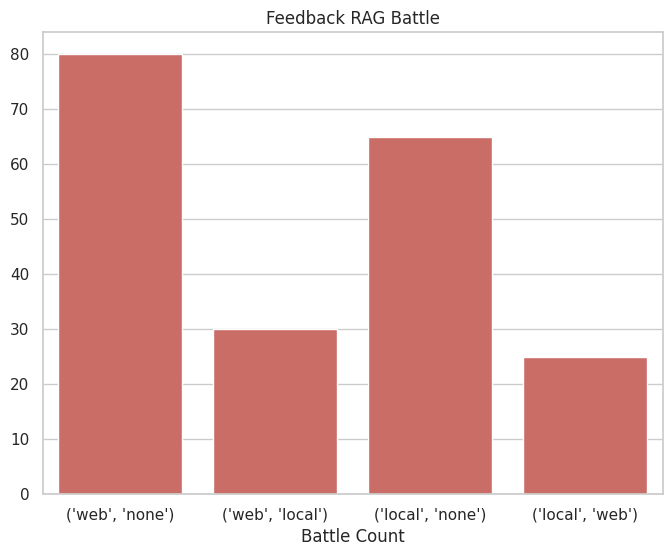

In [23]:
sns.set_theme(rc={'figure.figsize':(8,6)}, style='whitegrid', palette='hls')
sns.barplot(battles)
plt.xlabel('Battle Count')
plt.title('Feedback RAG Battle')

## Power Analysis

In [24]:
import scipy.stats as stats
import numpy as np

# Predefined probabilities
p_A_beats_B = 0.55  # Probability Method A is preferred over Method B

# Significance and power levels
alpha = 0.05  # Significance level
power = 0.80  # Desired power
min_power = 1 - power

# Simulation parameters
max_n = 1000  # Maximum number of matchups to simulate
step = 1  # Step size for increasing the number of matchups

# Store results
sample_sizes = []
powers = []

out = []

for p in range(10000):
    for n in range(step, max_n + 1, step):
        # Simulate outcomes based on the probability of A beating B
        wins_for_A = np.random.binomial(n, p_A_beats_B)

        # Perform a binomial test (testing against p=0.5, expecting A to win more than 50% of the time)
        p_value = stats.binomtest(wins_for_A, n, p=0.5, alternative="greater").pvalue

        # Check if the p-value is significant at the alpha level
        is_significant = p_value < alpha

        # Estimate power as the proportion of significant outcomes in simulations
        # (For simplicity in this example, we consider one simulation per sample size; in practice, you'd simulate many times per n)
        power_estimate = int(is_significant)

        # Store results
        sample_sizes.append(n)
        powers.append(power_estimate)

        # Stop the simulation if we achieve the desired power
        if power_estimate >= min_power:
            break

    # Output the sample size required to achieve the desired power
    required_sample_size = sample_sizes[-1] if powers[-1] >= min_power else None
    out.append(required_sample_size)

print(np.mean(out))

19.5583


---

# Battle Data EDA

## Import from HF


In [25]:
import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import scipy.stats as stats

/home/lance/miniconda3/envs/test/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
methods = ["none", "local", "web"]
def determine_loser(row):
    if row["winner"] == row["sample_a_method"]:
        return row["sample_b_method"]
    else:
        return row["sample_a_method"]

In [27]:
df = datasets.load_dataset("lancewilhelm/cs6804_final")
df = pd.DataFrame(df["train"])
df["loser"] = df.apply(determine_loser, axis=1)
df.head()

Generating train split: 2251 examples [00:00, 79584.08 examples/s]


,sample_index,sample_a_method,sample_b_method,winner,loser
0,61,none,web,web,none
1,26,local,web,web,local
2,41,none,web,none,web
3,83,none,web,none,web
4,22,web,local,local,web


## Samples

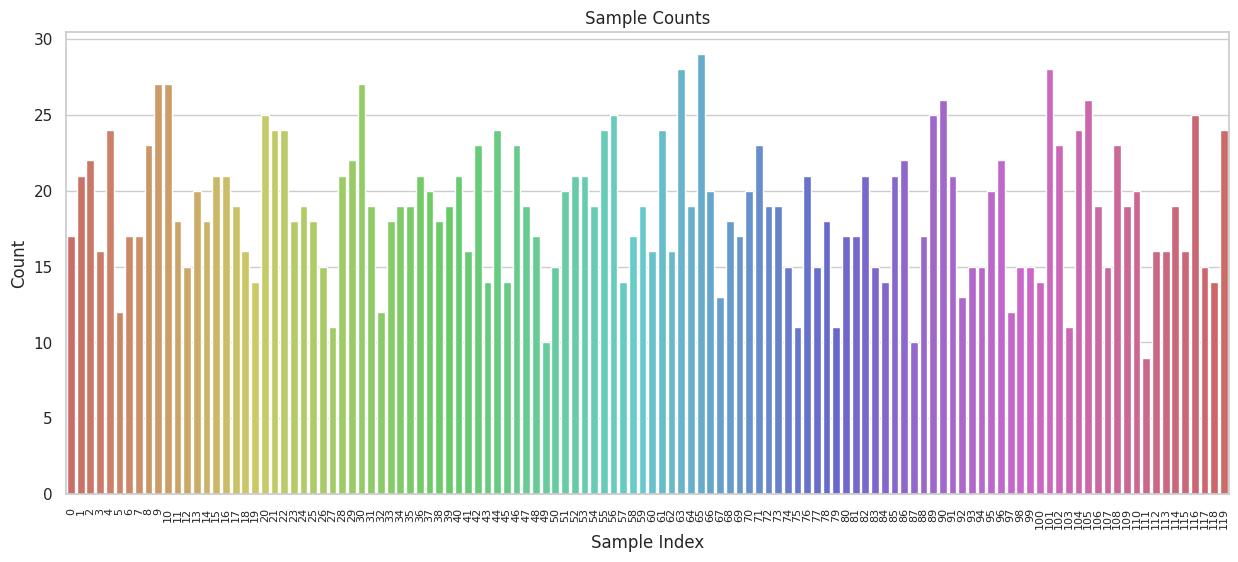

In [28]:
def graph_sample_counts(results):
    sns.set_theme(rc={'figure.figsize':(15,6)}, style='whitegrid', palette='hls')
    temp = results['sample_index'].value_counts().reset_index().astype(int).sort_values('sample_index')
    plt.xticks(rotation=90, fontsize=8)
    sns.barplot(temp, x='sample_index', y='count', hue='sample_index', palette='hls', legend=False)
    plt.xlabel('Sample Index')
    plt.ylabel('Count')
    plt.title('Sample Counts')

graph_sample_counts(df)

## Battles


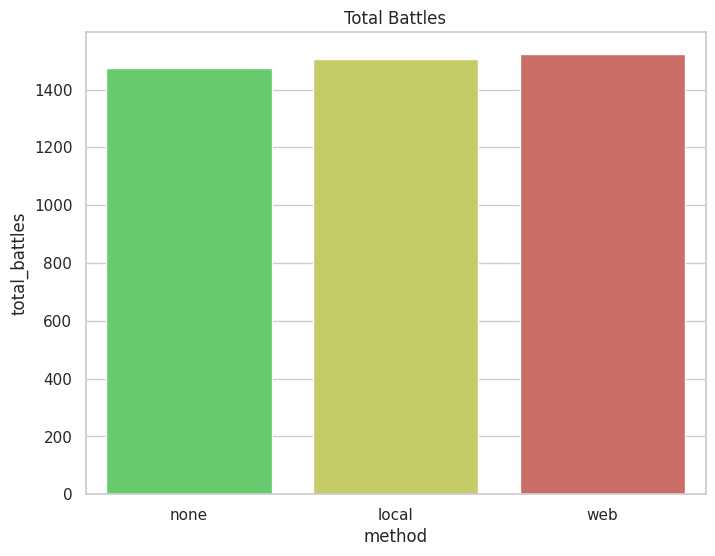

In [29]:
def graph_total_battles(results):
    sns.set_theme(rc={'figure.figsize':(8,6)}, style='whitegrid', palette='hls')
    total_battles = pd.concat([results["sample_a_method"], results["sample_b_method"]]).value_counts()
    temp = total_battles.reset_index()
    temp.columns = ["method", "total_battles"]
    sns.barplot(temp, x="method", y="total_battles", hue="method", order=methods)
    plt.title("Total Battles")

graph_total_battles(df)

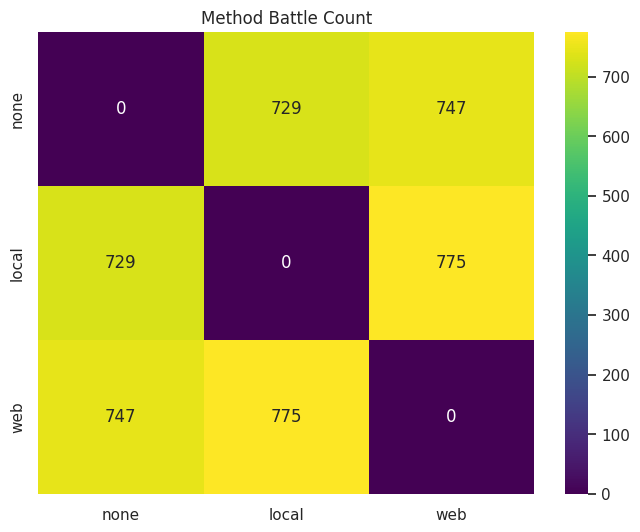

In [30]:
def count_total_h2h(results):
    results["model_combination"] = results.apply(
        lambda x: tuple(sorted([x["sample_a_method"], x["sample_b_method"]])), axis=1
    )

    # Count`` combinations
    combination_counts = results["model_combination"].value_counts().reset_index()
    combination_counts.columns = ["model_combination", "count"]

    # The pivot_table needs to be adjusted to ensure it's in the correct format for a heatmap
    # First, we'll extract the unique models to create the correct matrix shape
    unique_models = ['none', 'local', 'web']

    # Initialize a square dataframe with zeros
    heatmap_data = pd.DataFrame(0, index=unique_models, columns=unique_models)

    # Populate the heatmap data
    for _, row in combination_counts.iterrows():
        model_a, model_b = row["model_combination"]
        heatmap_data.loc[model_a, model_b] = row["count"]
        if model_a != model_b:  # Fill symmetric value if models are different
            heatmap_data.loc[model_b, model_a] = row["count"]
    return heatmap_data

def graph_battle_h2h(results):
    sns.set_theme(rc={'figure.figsize':(8,6)}, style='whitegrid', palette='hls')
    totals = count_total_h2h(results)
    sns.heatmap(totals, cmap="viridis", annot=True, fmt="d")
    plt.title("Method Battle Count")

graph_battle_h2h(df)

## Head-to-Head


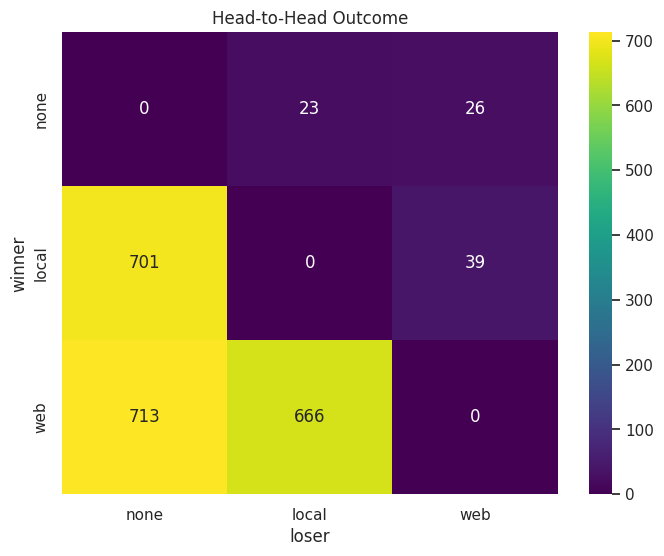

In [31]:
def count_wins_h2h(results):
    wins = pd.pivot_table(results[results['winner'] != 'tie'], index=["winner"], columns=["loser"], aggfunc="count")
    wins = wins["model_combination"].fillna(0)
    unique_models = ['none', 'local', 'web']
    wins = wins.reindex(index=unique_models, columns=unique_models)
    return wins

def graph_h2h_outcome(results):
    sns.set_theme(rc={'figure.figsize':(8,6)}, style='whitegrid', palette='hls')
    wins = count_wins_h2h(results)
    sns.heatmap(wins.astype(int), cmap="viridis", annot=True, fmt="d")
    plt.title("Head-to-Head Outcome")

graph_h2h_outcome(df)

## Binomial Test

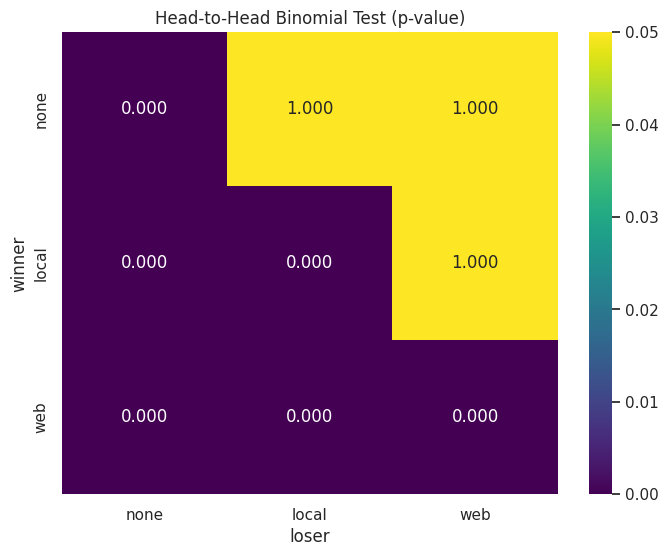

In [32]:
def graph_h2h_binomtest(results):
    sns.set_theme(rc={'figure.figsize':(8,6)}, style='whitegrid', palette='hls')
    wins = count_wins_h2h(results)
    totals = count_total_h2h(results)
    totals.index.name = "winner"
    totals.columns.name = "loser"
    p_values = wins.copy() * 0
    # Iterate over every combination of models
    for winner in wins.index:
        for loser in wins.columns:
            if winner == loser:
                continue
            # Perform a binomial test to determine if the win rate is significantly different from 0.5
            wins_for_winner = int(wins.loc[winner, loser])
            total_battles = int(totals.loc[winner, loser])
            p_values.loc[winner, loser] = stats.binomtest(wins_for_winner, total_battles, p=0.5, alternative="greater").pvalue

    sns.heatmap(p_values, cmap="viridis", annot=True, fmt=".3f", vmin=0, vmax=0.05)
    plt.title("Head-to-Head Binomial Test (p-value)")

graph_h2h_binomtest(df)

## Proportion of Head-to-Head


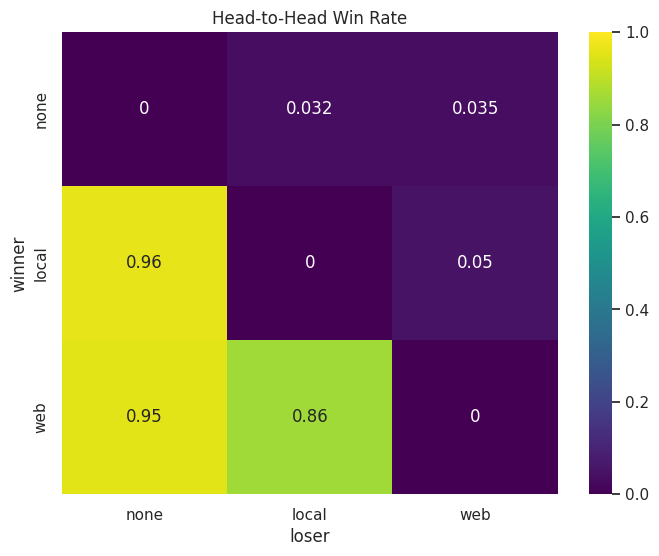

In [33]:
def graph_h2h_win_rate(results):
    sns.set_theme(rc={'figure.figsize':(8,6)}, style='whitegrid', palette='hls')
    wins = count_wins_h2h(results)
    totals = count_total_h2h(results)
    sns.heatmap((wins / totals).fillna(0), cmap="viridis", annot=True, vmin=0, vmax=1)
    plt.title("Head-to-Head Win Rate")

graph_h2h_win_rate(df)

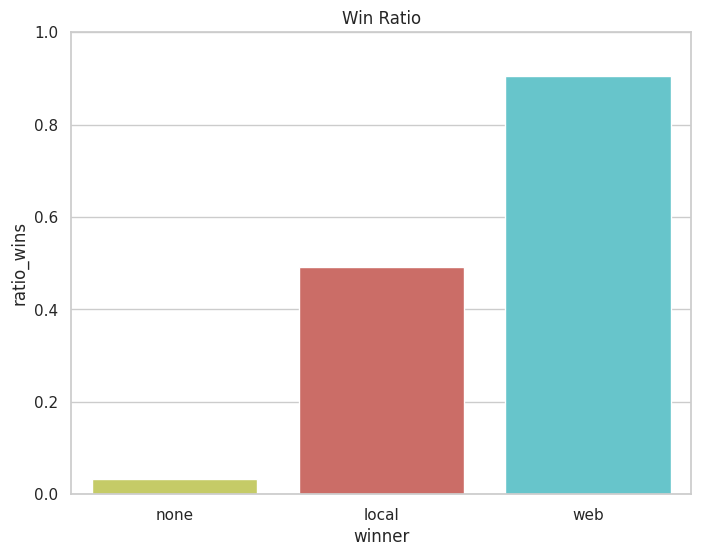

In [34]:
def get_ratio_wins(results):
    total_wins = results["winner"].value_counts()
    total_battles = pd.concat([results["sample_a_method"], results["sample_b_method"]]).value_counts()
    ratio_wins = (total_wins / total_battles).reset_index()
    ratio_wins.columns = ["winner", "ratio_wins"]
    return ratio_wins

def graph_ratio_wins(results):
    sns.set_theme(rc={'figure.figsize':(8,6)}, style='whitegrid', palette='hls')
    ratio_wins = get_ratio_wins(results)
    sns.barplot(
        ratio_wins, x="winner", y="ratio_wins", hue="winner", legend=False, order=methods
    )
    plt.ylim(0, 1)
    plt.title("Win Ratio")

graph_ratio_wins(df)

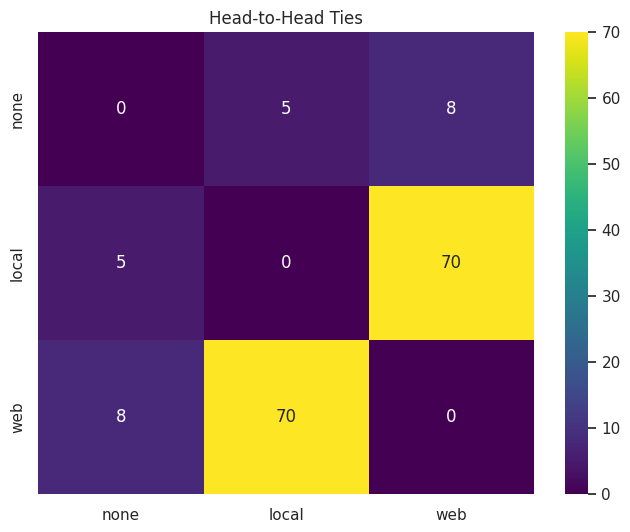

In [35]:
def graph_h2h_ties(results):
    results["model_combination"] = results.apply(
        lambda x: tuple(sorted([x["sample_a_method"], x["sample_b_method"]])), axis=1
    )

    # Count`` combinations
    combination_counts = results[results["winner"] == "tie"]["model_combination"].value_counts().reset_index()
    combination_counts.columns = ["model_combination", "count"]

    # The pivot_table needs to be adjusted to ensure it's in the correct format for a heatmap
    # First, we'll extract the unique models to create the correct matrix shape
    unique_models = ['none', 'local', 'web']

    # Initialize a square dataframe with zeros
    ties = pd.DataFrame(0, index=unique_models, columns=unique_models)

    # Populate the heatmap data
    for _, row in combination_counts.iterrows():
        model_a, model_b = row["model_combination"]
        ties.loc[model_a, model_b] = row["count"]
        if model_a != model_b:  # Fill symmetric value if models are different
            ties.loc[model_b, model_a] = row["count"]

    sns.set_theme(rc={'figure.figsize':(8,6)}, style='whitegrid', palette='hls')
    sns.heatmap(ties, cmap="viridis", annot=True)
    plt.title('Head-to-Head Ties')

graph_h2h_ties(df)

## ELO


In [36]:
def compute_elo(battles, K=4, SCALE=400, BASE=10, INIT_RATING=1000):
    rating = defaultdict(lambda: INIT_RATING)
    for rd, sample_a_method, sample_b_method, winner in battles[['sample_a_method', 'sample_b_method', 'winner']].itertuples():
        ra = rating[sample_a_method]
        rb = rating[sample_b_method]
        ea = 1 / (1 + BASE ** ((rb - ra) / SCALE))
        eb = 1 / (1 + BASE ** ((ra - rb) / SCALE))
        if winner == "sample_a_method":
            sa = 1
        elif winner == "sample_b_method":
            sa = 0
        elif winner == "tie" or winner == "tie (bothbad)":
            sa = 0.5
        else:
            raise Exception(f"unexpected vote {winner}")
        rating[sample_a_method] += K * (sa - ea)
        rating[sample_b_method] += K * (1 - sa - eb)
    return rating

def prep_for_elo(row):
    if row['winner'] == row['sample_a_method']:
        return 'sample_a_method'
    elif row['winner'] == row['sample_b_method']:
        return 'sample_b_method'
    elif row['winner'] == 'tie':
        return 'tie'
    else:
        return None

In [37]:
elo_df = df.copy()
elo_df['winner'] = elo_df.apply(prep_for_elo, axis=1)
compute_elo(elo_df)

defaultdict(<function __main__.compute_elo.<locals>.<lambda>()>,
            {'none': 682.1963051456787,
             'web': 1293.5713658617167,
             'local': 1024.232328992607})

## Calculate the Proportion of Selctions

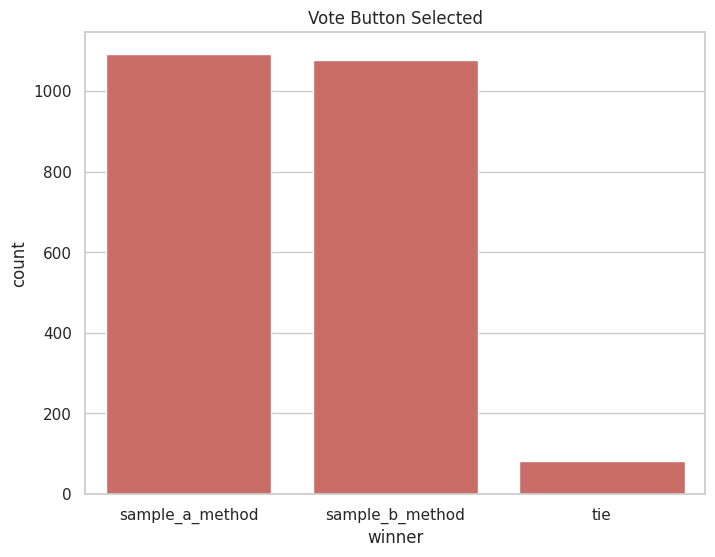

In [38]:
def graph_button_selected(results):
    sns.set_theme(rc={'figure.figsize':(8,6)}, style='whitegrid', palette='hls')
    sns.barplot(results['winner'].value_counts())
    plt.title('Vote Button Selected')

graph_button_selected(elo_df)

---

# Compare Different Judges

In [77]:
import json
import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
methods = ["none", "local", "web"]

# Human
human = datasets.load_dataset("lancewilhelm/cs6804_final")
human = pd.DataFrame(human['train'])
human['model'] = 'human'

#GPT4
with open('data/llm_gpt4_judge_results.json') as f:
    gpt4 = pd.DataFrame(json.load(f))
    gpt4['model'] = 'gpt4'

#GPT3.5
with open('data/llm_gpt35_judge_results.json') as f:
    gpt35 = pd.DataFrame(json.load(f))
    gpt35['model'] = 'gpt3.5'

#Llama2
with open('data/llm_llama2chat7b_judge_results.json') as f:
    llama2 = pd.DataFrame(json.load(f))
    llama2['model'] = 'llama2'

#Gemma
with open('data/llm_gemma_judge_results.json') as f:
    gemma = pd.DataFrame(json.load(f))
    gemma['model'] = 'gemma'

#Mistral
with open('data/llm_mistral_judge_results.json') as f:
    mistral = pd.DataFrame(json.load(f))
    mistral['model'] = 'mistral'

#Llama3
with open('data/llm_llama3_judge_results.json') as f:
    llama3 = pd.DataFrame(json.load(f))
    llama3['model'] = 'llama3'

In [79]:
# Merge dataframes
all_judges = pd.concat([human, gpt4, gpt35, llama2, llama3, gemma, mistral])
all_judges.head()

,sample_index,sample_a_method,sample_b_method,winner,model
0,61,none,web,web,human
1,26,local,web,web,human
2,41,none,web,none,human
3,83,none,web,none,human
4,22,web,local,local,human


In [83]:
temp = all_judges.value_counts(['sample_a_method','sample_b_method','model'])
temp = temp.reset_index()
df1 = temp[['sample_a_method', 'model', 'count']].rename(columns={'sample_a_method': 'method'})
df2 = temp[['sample_b_method', 'model', 'count']].rename(columns={'sample_b_method': 'method'})
temp = pd.concat([df1, df2]).groupby(['model','method']).sum()
temp = temp['count']
temp.name = 'total_battles'

total_wins = all_judges.rename(columns={'winner':'method'}).groupby(['model', 'method']).size()
total_wins.name = 'total_wins'
combo = pd.merge(total_wins, temp, left_index=True, right_index=True)
combo['ratio'] = combo['total_wins'] / combo['total_battles']
combo
combo = combo.reset_index()
combo.columns = ['model', 'method', 'total_wins', 'total_battles', 'ratio_wins']

Text(0.5, 1.0, 'Win Ratios')

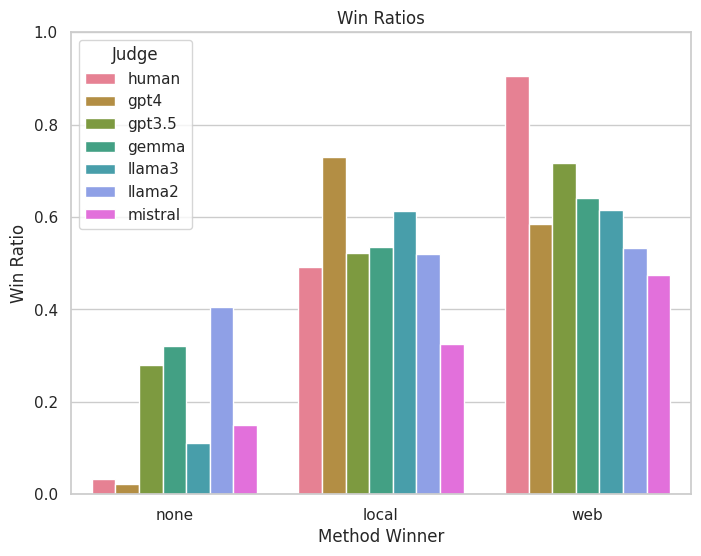

In [84]:
sns.set_theme(rc={'figure.figsize':(8,6)}, style='whitegrid', palette='hls')
sns.barplot(
    combo, x="method", y="ratio_wins", hue="model", order=['none', 'local', 'web'], hue_order=['human', 'gpt4', 'gpt3.5', 'gemma', 'llama3', 'llama2',  'mistral']
)
plt.ylim(0, 1)
plt.legend(title='Judge')
plt.xlabel('Method Winner')
plt.ylabel('Win Ratio')
plt.title("Win Ratios")

Text(0.5, 1.0, 'Win Ratios')

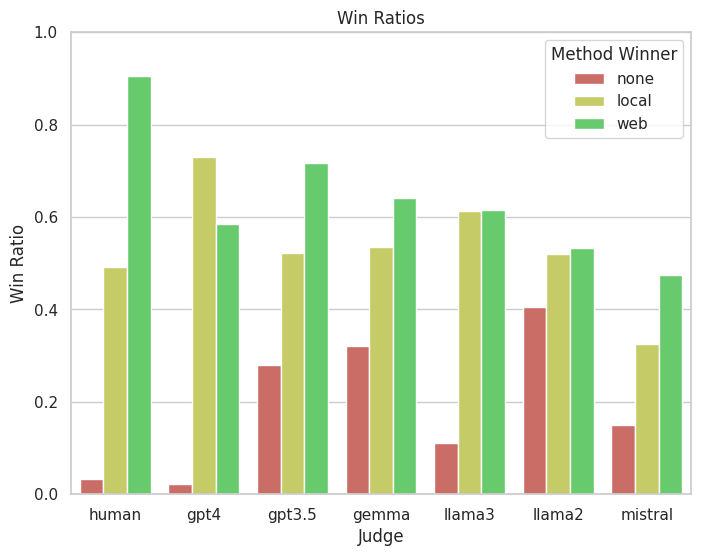

In [85]:
sns.set_theme(rc={'figure.figsize':(8,6)}, style='whitegrid', palette='hls')
sns.barplot(
    combo, x="model", y="ratio_wins", hue="method", order=['human', 'gpt4', 'gpt3.5', 'gemma', 'llama3', 'llama2', 'mistral'], hue_order=['none', 'local', 'web']
)
plt.ylim(0, 1)
plt.legend(title='Method Winner')
plt.xlabel('Judge')
plt.ylabel('Win Ratio')
plt.title("Win Ratios")

Text(0.5, 1.0, 'Tie Ratio of Overall Battles')

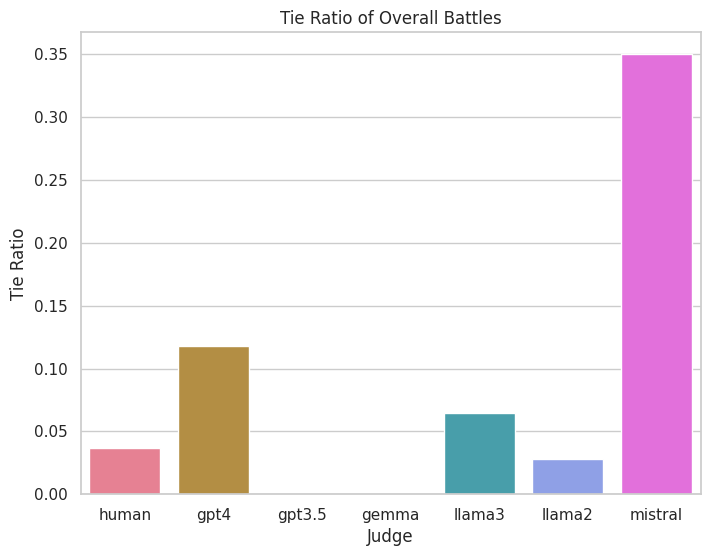

In [86]:
total_battles = all_judges.groupby('model').size()
ties = all_judges.rename(columns={'winner':'method'}).groupby(['model', 'method']).size().reset_index()
ties = ties[ties['method'] == 'tie'][['model', 0]]
ties.columns = ['model', 'ties']
ties = ties.set_index('model')['ties']
ties.name = 'ties'
total_battles.name = 'total_battles'
combo_ties = pd.merge(ties, total_battles, how='right', left_index=True, right_index=True).fillna(0)
combo_ties['ratio_tie'] = combo_ties['ties'] / combo_ties['total_battles']
combo_ties = combo_ties.reset_index()

sns.set_theme(rc={'figure.figsize':(8,6)}, style='whitegrid', palette='hls')
sns.barplot(
    combo_ties, x="model", y="ratio_tie", hue="model", legend=False, order=['human', 'gpt4', 'gpt3.5', 'gemma', 'llama3', 'llama2', 'mistral'], hue_order=['human', 'gpt4', 'gpt3.5', 'gemma', 'llama3', 'llama2', 'mistral']
)

plt.xlabel('Judge')
plt.ylabel('Tie Ratio')
plt.title("Tie Ratio of Overall Battles")

## Heatmaps of Judges

### Human

Text(0.5, 1.0, 'Human - Head-to-Head Win Rate')

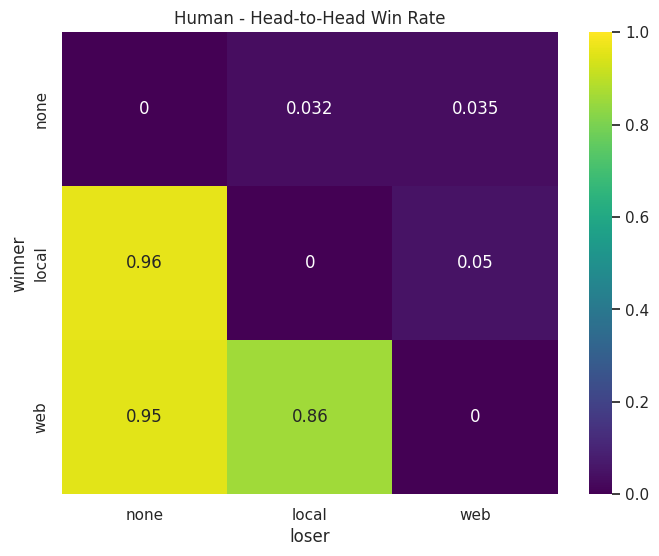

In [46]:
human['loser'] = human.apply(determine_loser, axis=1)
_ = count_total_h2h(human)
graph_h2h_win_rate(human)
plt.title('Human - Head-to-Head Win Rate')

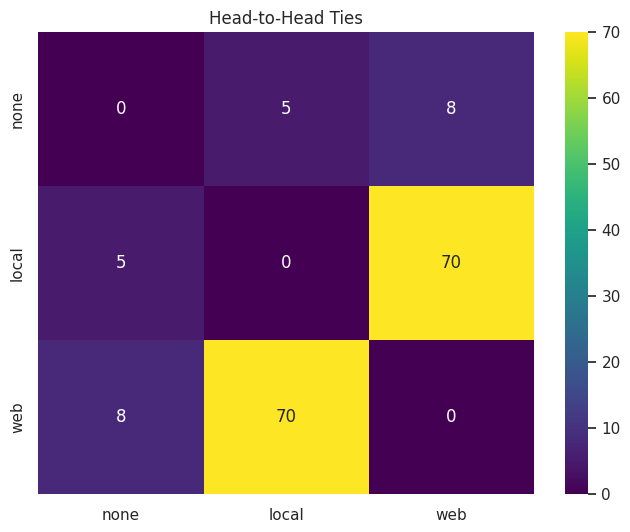

In [47]:
graph_h2h_ties(human)

Text(0.5, 1.0, 'Human - Head-to-Head Binomial Test (p-value)')

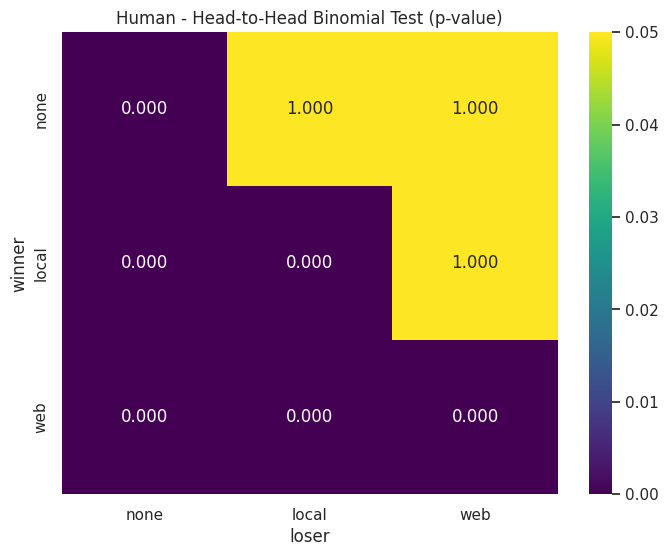

In [48]:
graph_h2h_binomtest(human)
plt.title('Human - Head-to-Head Binomial Test (p-value)')

### GPT4

Text(0.5, 1.0, 'GPT4 - Head-to-Head Win Rate')

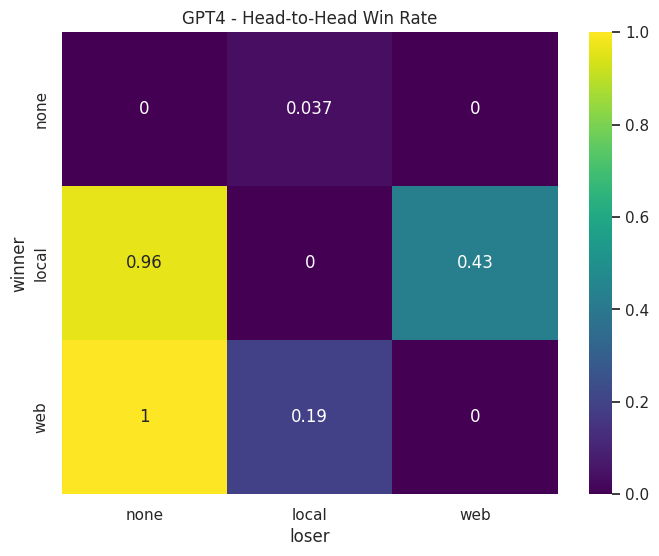

In [49]:
gpt4['loser'] = gpt4.apply(determine_loser, axis=1)
_ = count_total_h2h(gpt4)
graph_h2h_win_rate(gpt4)
plt.title('GPT4 - Head-to-Head Win Rate')

Text(0.5, 1.0, 'GPT4 - Head-to-Head Ties')

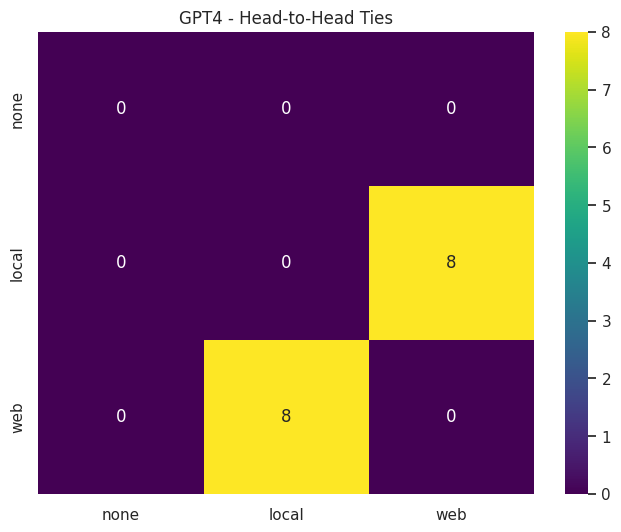

In [50]:
graph_h2h_ties(gpt4)
plt.title('GPT4 - Head-to-Head Ties')

Text(0.5, 1.0, 'GPT4 - Head-to-Head Binomial Test (p-value)')

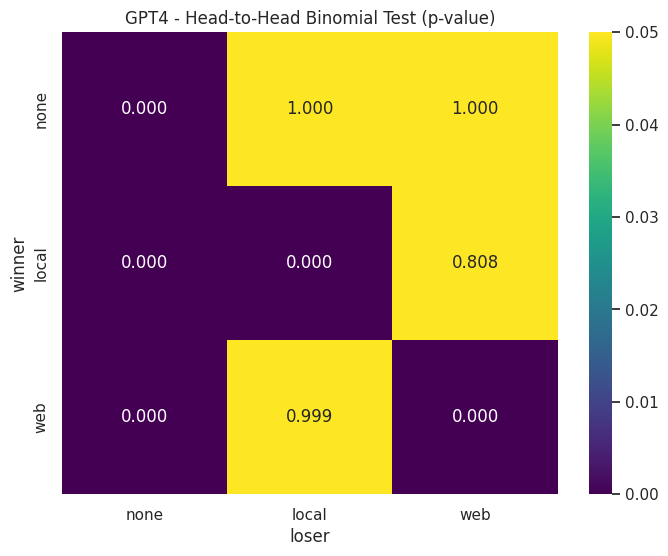

In [51]:
graph_h2h_binomtest(gpt4)
plt.title('GPT4 - Head-to-Head Binomial Test (p-value)')

### GPT3.5

Text(0.5, 1.0, 'GPT3.5 - Head-to-Head Win Rate')

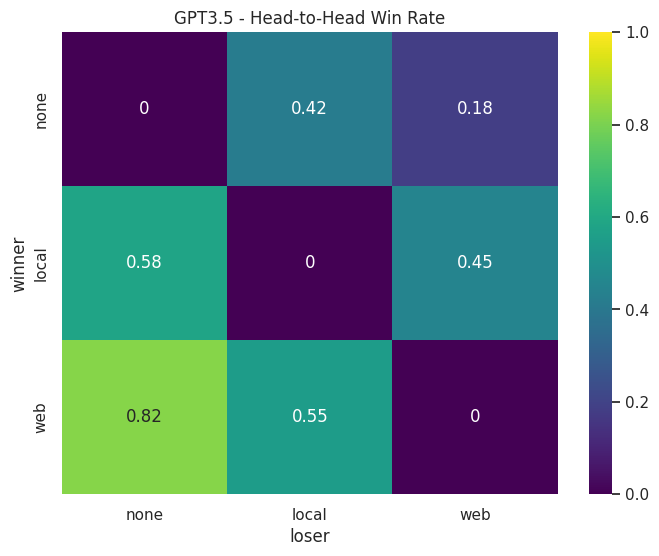

In [52]:
gpt35['loser'] = gpt35.apply(determine_loser, axis=1)
_ = count_total_h2h(gpt35)
graph_h2h_win_rate(gpt35)
plt.title('GPT3.5 - Head-to-Head Win Rate')

Text(0.5, 1.0, 'GPT3.5 - Head-to-Head Ties')

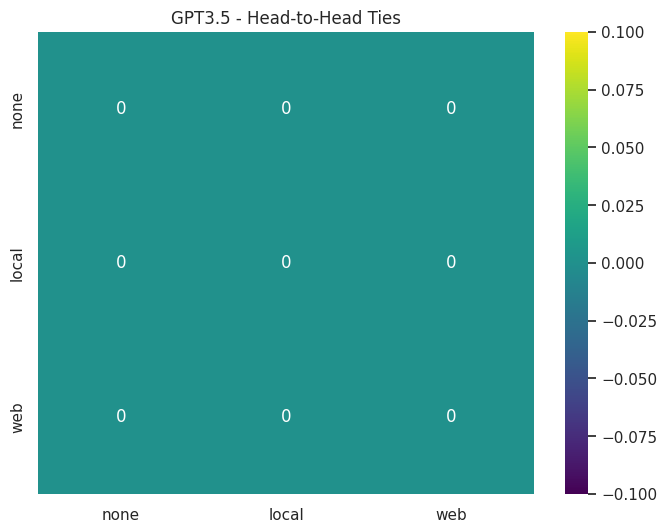

In [53]:
graph_h2h_ties(gpt35)
plt.title('GPT3.5 - Head-to-Head Ties')

Text(0.5, 1.0, 'GPT3.5 - Head-to-Head Binomial Test (p-value)')

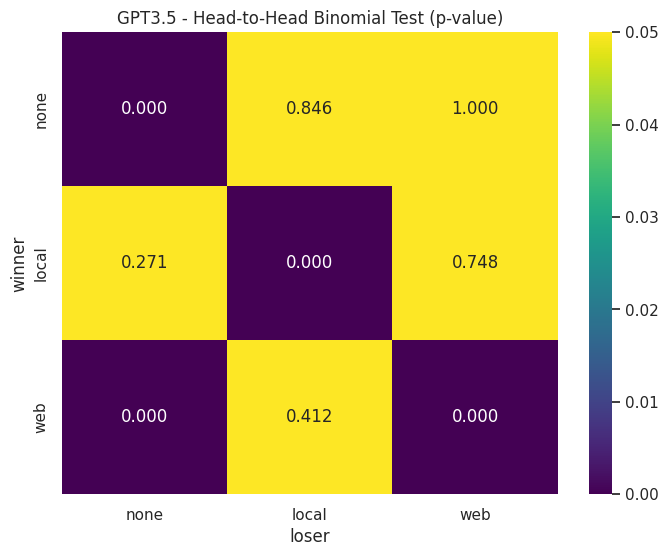

In [54]:
graph_h2h_binomtest(gpt35)
plt.title('GPT3.5 - Head-to-Head Binomial Test (p-value)')

### Gemma

Text(0.5, 1.0, 'Gemma - Head-to-Head Win Rate')

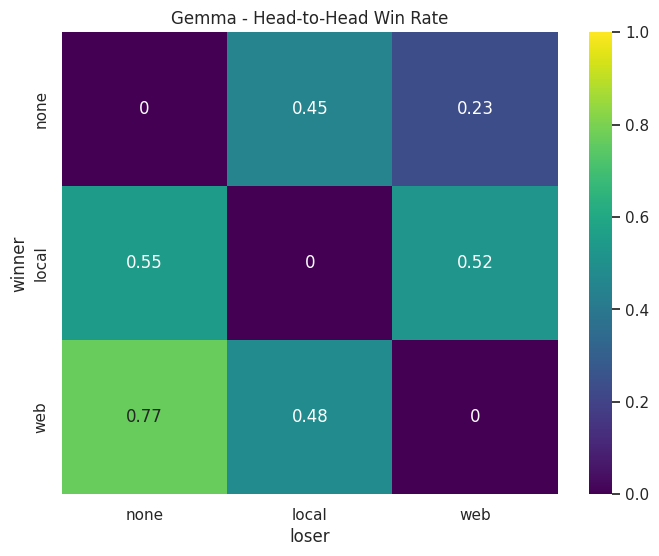

In [55]:
gemma['loser'] = gemma.apply(determine_loser, axis=1)
_ = count_total_h2h(gemma)
graph_h2h_win_rate(gemma)
plt.title('Gemma - Head-to-Head Win Rate')

Text(0.5, 1.0, 'Gemma - Head-to-Head Ties')

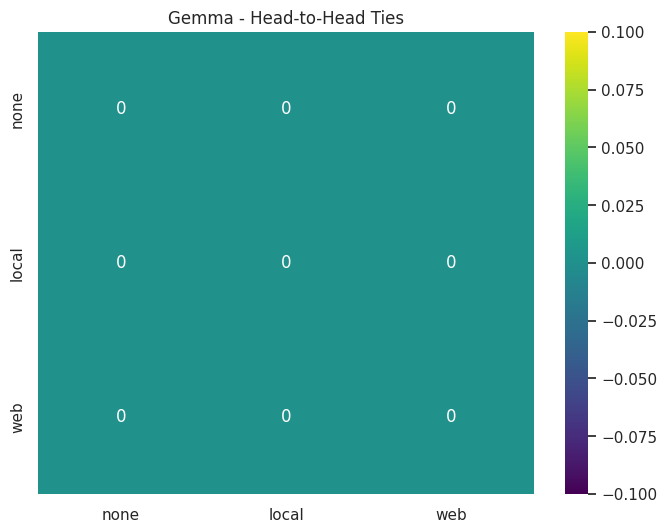

In [56]:
graph_h2h_ties(gemma)
plt.title('Gemma - Head-to-Head Ties')

Text(0.5, 1.0, 'Gemma - Head-to-Head Binomial Test (p-value)')

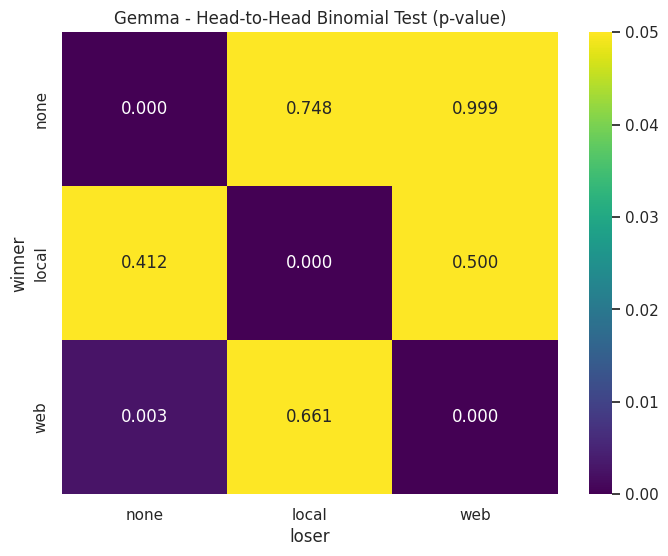

In [57]:
graph_h2h_binomtest(gemma)
plt.title('Gemma - Head-to-Head Binomial Test (p-value)')

### Llama2

Text(0.5, 1.0, 'Llama2 - Head-to-Head Win Rate')

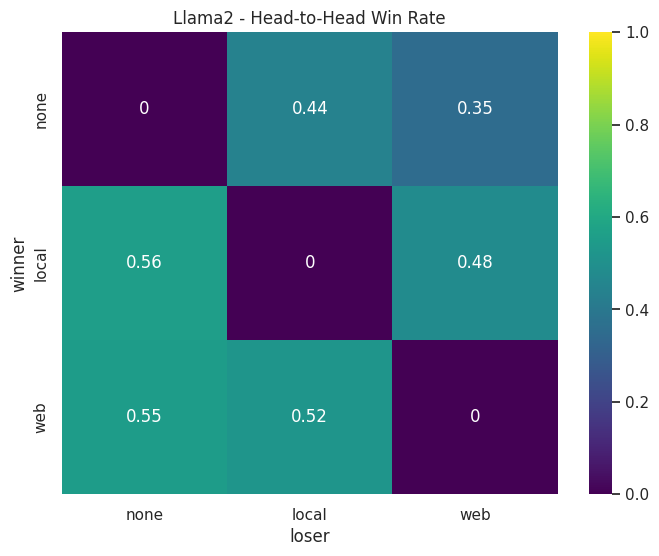

In [58]:
llama2['loser'] = llama2.apply(determine_loser, axis=1)
_ = count_total_h2h(llama2)
graph_h2h_win_rate(llama2)
plt.title('Llama2 - Head-to-Head Win Rate')

Text(0.5, 1.0, 'Llama2 - Head-to-Head Ties')

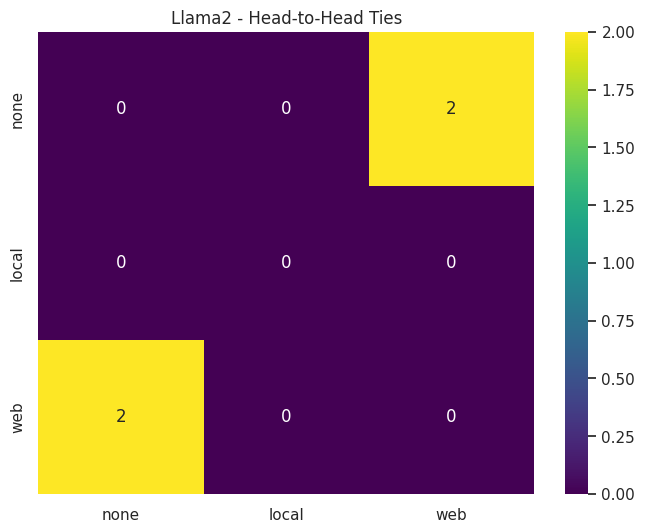

In [59]:
graph_h2h_ties(llama2)
plt.title('Llama2 - Head-to-Head Ties')

Text(0.5, 1.0, 'Llama2 - Head-to-Head Binomial Test (p-value)')

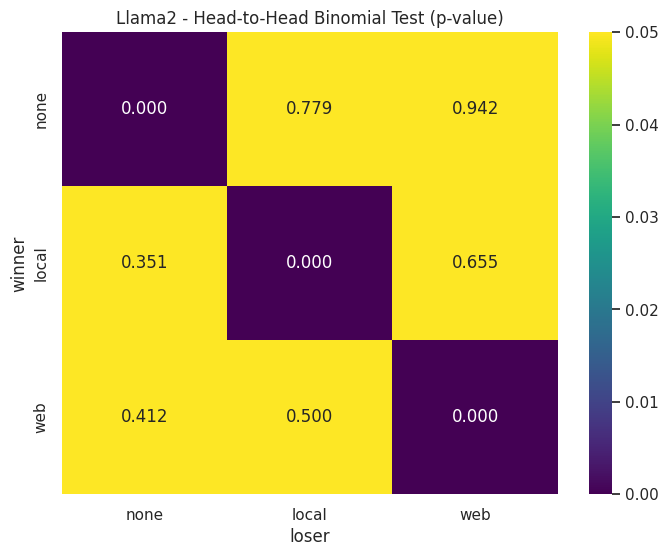

In [60]:
graph_h2h_binomtest(llama2)
plt.title('Llama2 - Head-to-Head Binomial Test (p-value)')

### Mistral

Text(0.5, 1.0, 'Mistral - Head-to-Head Win Rate')

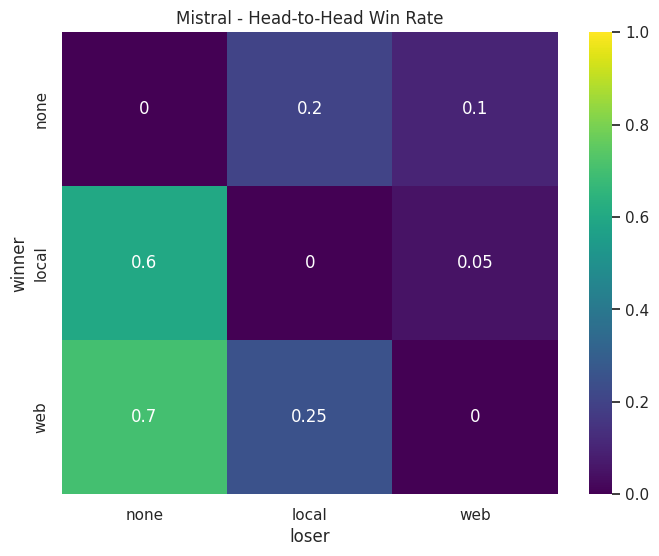

In [61]:
mistral['loser'] = mistral.apply(determine_loser, axis=1)
_ = count_total_h2h(mistral)
graph_h2h_win_rate(mistral)
plt.title('Mistral - Head-to-Head Win Rate')

Text(0.5, 1.0, 'Mistral - Head-to-Head Ties')

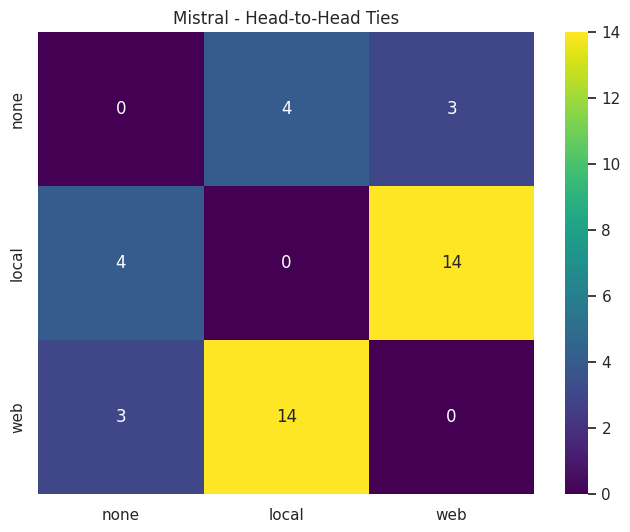

In [62]:
graph_h2h_ties(mistral)
plt.title('Mistral - Head-to-Head Ties')

Text(0.5, 1.0, 'Mistral - Head-to-Head Binomial Test (p-value)')

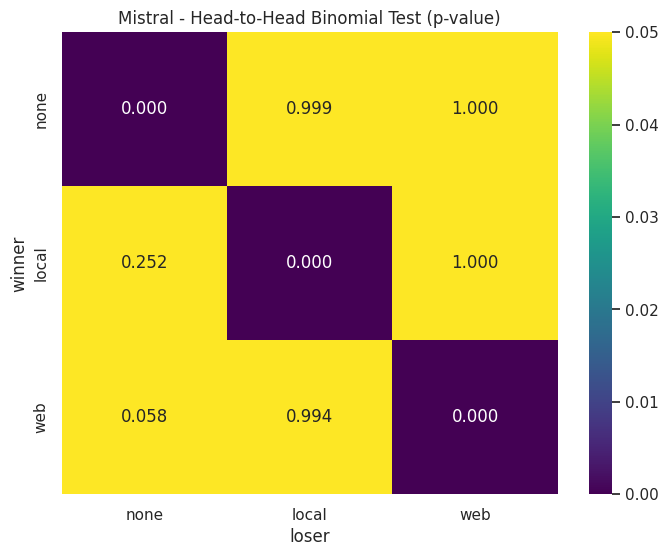

In [63]:
graph_h2h_binomtest(mistral)
plt.title('Mistral - Head-to-Head Binomial Test (p-value)')

### Llama3

Text(0.5, 1.0, 'Llama3 - Head-to-Head Win Rate')

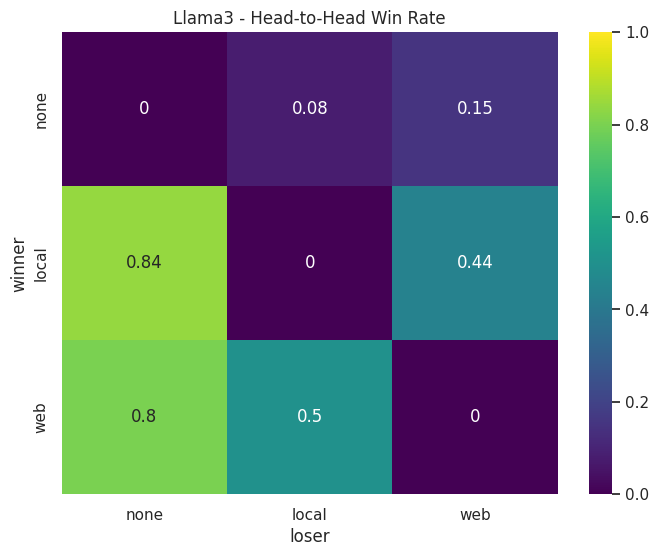

In [64]:
llama3['loser'] = llama3.apply(determine_loser, axis=1)
_ = count_total_h2h(llama3)
graph_h2h_win_rate(llama3)
plt.title('Llama3 - Head-to-Head Win Rate')

Text(0.5, 1.0, 'Llama3 - Head-to-Head Ties')

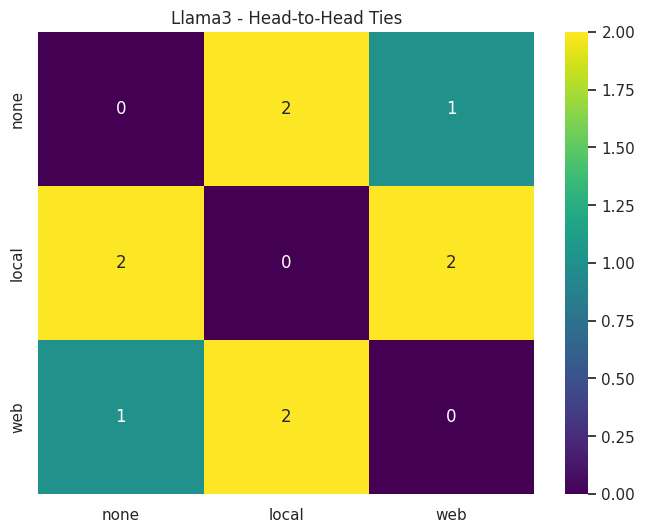

In [65]:
graph_h2h_ties(llama3)
plt.title('Llama3 - Head-to-Head Ties')

Text(0.5, 1.0, 'Llama3 - Head-to-Head Binomial Test (p-value)')

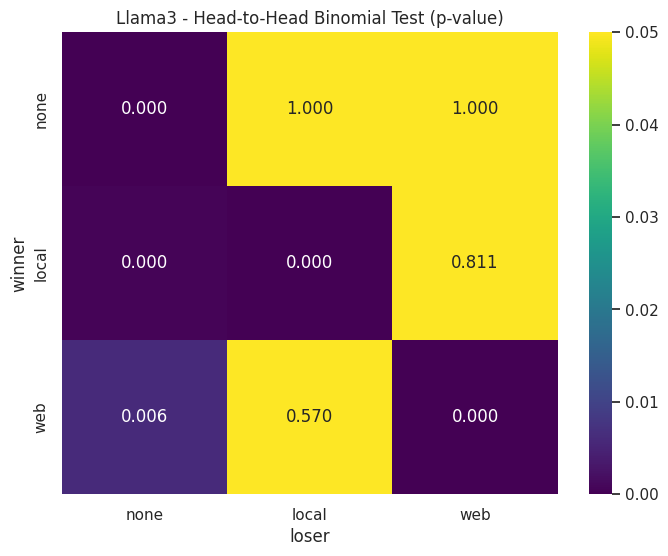

In [66]:
graph_h2h_binomtest(llama3)
plt.title('Llama3 - Head-to-Head Binomial Test (p-value)')

# Hypothesis Testing of Judges

In [67]:
total_wins['human'].reset_index()

,method,total_wins
0,local,740
1,none,49
2,tie,83
3,web,1379


In [68]:
temp = all_judges.value_counts(['sample_a_method','sample_b_method','model'])
temp = temp.reset_index()
df1 = temp[['sample_a_method', 'model', 'count']].rename(columns={'sample_a_method': 'method'})
df2 = temp[['sample_b_method', 'model', 'count']].rename(columns={'sample_b_method': 'method'})
temp = pd.concat([df1, df2]).groupby(['model','method']).sum()
total_battles = temp['count']
total_battles.name = 'total_battles'

## Human

In [69]:
from scipy.stats import chi2_contingency

# Since our dataset has only win counts and no losses or ties directly (ties counted as a separate category),
# we'll adjust our table for the chi-square test.
# The chi-square test in this format assumes all other outcomes are "not wins",
# so our contingency table effectively compares wins against all other outcomes.

# Constructing a contingency table for the chi-square test
# Here, we assume the total number of battles is the sum of all wins.
# This is a simplification, as the actual dataset might have more detailed interactions.
# In a more detailed analysis, you would include the counts of losses and ties per method for each pair-wise comparison.

win_counts_df = total_wins['human'].reset_index()
win_counts_df.columns = ['method', 'Wins']
win_counts_df = win_counts_df[win_counts_df['method'] != 'tie']
combo = pd.merge(win_counts_df, total_battles['human'], on='method')
combo['losses'] = combo['total_battles'] - combo['Wins']
# total_battles = sum(win_counts_df['Wins'])
contingency_table = [[win for win in combo['Wins']],
                     [loss for loss in combo['losses']]]

res = chi2_contingency(contingency_table)

print(f'Statistic: \t\t{res.statistic}')
print(f'P-value: \t\t{res.pvalue}')
print(f'Degrees of freedom: \t{res.dof}')
print(f'Expected frequencies: \t{res.expected_freq}')

Statistic: 		2287.6215703550333
P-value: 		0.0
Degrees of freedom: 	2
Expected frequencies: 	[[724.27187916 710.78809418 732.94002665]
 [779.72812084 765.21190582 789.05997335]]


## GPT4

In [70]:
from scipy.stats import chi2_contingency

# Since our dataset has only win counts and no losses or ties directly (ties counted as a separate category),
# we'll adjust our table for the chi-square test.
# The chi-square test in this format assumes all other outcomes are "not wins",
# so our contingency table effectively compares wins against all other outcomes.

# Constructing a contingency table for the chi-square test
# Here, we assume the total number of battles is the sum of all wins.
# This is a simplification, as the actual dataset might have more detailed interactions.
# In a more detailed analysis, you would include the counts of losses and ties per method for each pair-wise comparison.

win_counts_df = total_wins['gpt4'].reset_index()
win_counts_df.columns = ['method', 'Wins']
win_counts_df = win_counts_df[win_counts_df['method'] != 'tie']
combo = pd.merge(win_counts_df, total_battles['gpt4'], on='method')
combo['losses'] = combo['total_battles'] - combo['Wins']
# total_battles = sum(win_counts_df['Wins'])
contingency_table = [[win for win in combo['Wins']],
                     [loss for loss in combo['losses']]]

res = chi2_contingency(contingency_table)

print(f'Statistic: \t\t{res.statistic}')
print(f'P-value: \t\t{res.pvalue}')
print(f'Degrees of freedom: \t{res.dof}')
print(f'Expected frequencies: \t{res.expected_freq}')

Statistic: 		53.21778709444429
P-value: 		2.779101207314909e-12
Degrees of freedom: 	2
Expected frequencies: 	[[21.17647059 20.73529412 18.08823529]
 [26.82352941 26.26470588 22.91176471]]


## GPT3.5

In [71]:
from scipy.stats import chi2_contingency

# Since our dataset has only win counts and no losses or ties directly (ties counted as a separate category),
# we'll adjust our table for the chi-square test.
# The chi-square test in this format assumes all other outcomes are "not wins",
# so our contingency table effectively compares wins against all other outcomes.

# Constructing a contingency table for the chi-square test
# Here, we assume the total number of battles is the sum of all wins.
# This is a simplification, as the actual dataset might have more detailed interactions.
# In a more detailed analysis, you would include the counts of losses and ties per method for each pair-wise comparison.

win_counts_df = total_wins['gpt3.5'].reset_index()
win_counts_df.columns = ['method', 'Wins']
win_counts_df = win_counts_df[win_counts_df['method'] != 'tie']
combo = pd.merge(win_counts_df, total_battles['gpt4'], on='method')
combo['losses'] = combo['total_battles'] - combo['Wins']
# total_battles = sum(win_counts_df['Wins'])
contingency_table = [[win for win in combo['Wins']],
                     [loss for loss in combo['losses']]]

res = chi2_contingency(contingency_table)

print(f'Statistic: \t\t{res.statistic}')
print(f'P-value: \t\t{res.pvalue}')
print(f'Degrees of freedom: \t{res.dof}')
print(f'Expected frequencies: \t{res.expected_freq}')

Statistic: 		32.94334164804641
P-value: 		7.021732060920475e-08
Degrees of freedom: 	2
Expected frequencies: 	[[27.17647059 26.61029412 23.21323529]
 [20.82352941 20.38970588 17.78676471]]


## Llama2

In [72]:
from scipy.stats import chi2_contingency

# Since our dataset has only win counts and no losses or ties directly (ties counted as a separate category),
# we'll adjust our table for the chi-square test.
# The chi-square test in this format assumes all other outcomes are "not wins",
# so our contingency table effectively compares wins against all other outcomes.

# Constructing a contingency table for the chi-square test
# Here, we assume the total number of battles is the sum of all wins.
# This is a simplification, as the actual dataset might have more detailed interactions.
# In a more detailed analysis, you would include the counts of losses and ties per method for each pair-wise comparison.

win_counts_df = total_wins['llama2'].reset_index()
win_counts_df.columns = ['method', 'Wins']
win_counts_df = win_counts_df[win_counts_df['method'] != 'tie']
combo = pd.merge(win_counts_df, total_battles['llama2'], on='method')
combo['losses'] = combo['total_battles'] - combo['Wins']
# total_battles = sum(win_counts_df['Wins'])
contingency_table = [[win for win in combo['Wins']],
                     [loss for loss in combo['losses']]]

res = chi2_contingency(contingency_table)

print(f'Statistic: \t\t{res.statistic}')
print(f'P-value: \t\t{res.pvalue}')
print(f'Degrees of freedom: \t{res.dof}')
print(f'Expected frequencies: \t{res.expected_freq}')

Statistic: 		1.8906750753559258
P-value: 		0.3885483990408872
Degrees of freedom: 	2
Expected frequencies: 	[[25.27777778 22.84722222 21.875     ]
 [26.72222222 24.15277778 23.125     ]]


## Gemma

In [73]:
from scipy.stats import chi2_contingency

# Since our dataset has only win counts and no losses or ties directly (ties counted as a separate category),
# we'll adjust our table for the chi-square test.
# The chi-square test in this format assumes all other outcomes are "not wins",
# so our contingency table effectively compares wins against all other outcomes.

# Constructing a contingency table for the chi-square test
# Here, we assume the total number of battles is the sum of all wins.
# This is a simplification, as the actual dataset might have more detailed interactions.
# In a more detailed analysis, you would include the counts of losses and ties per method for each pair-wise comparison.

win_counts_df = total_wins['gemma'].reset_index()
win_counts_df.columns = ['method', 'Wins']
win_counts_df = win_counts_df[win_counts_df['method'] != 'tie']
combo = pd.merge(win_counts_df, total_battles['gemma'], on='method')
combo['losses'] = combo['total_battles'] - combo['Wins']
# total_battles = sum(win_counts_df['Wins'])
contingency_table = [[win for win in combo['Wins']],
                     [loss for loss in combo['losses']]]

res = chi2_contingency(contingency_table)

print(f'Statistic: \t\t{res.statistic}')
print(f'P-value: \t\t{res.pvalue}')
print(f'Degrees of freedom: \t{res.dof}')
print(f'Expected frequencies: \t{res.expected_freq}')

Statistic: 		10.93458534444932
P-value: 		0.004222648791097427
Degrees of freedom: 	2
Expected frequencies: 	[[21.5 25.  26.5]
 [21.5 25.  26.5]]


## Mistral

In [74]:
from scipy.stats import chi2_contingency

# Since our dataset has only win counts and no losses or ties directly (ties counted as a separate category),
# we'll adjust our table for the chi-square test.
# The chi-square test in this format assumes all other outcomes are "not wins",
# so our contingency table effectively compares wins against all other outcomes.

# Constructing a contingency table for the chi-square test
# Here, we assume the total number of battles is the sum of all wins.
# This is a simplification, as the actual dataset might have more detailed interactions.
# In a more detailed analysis, you would include the counts of losses and ties per method for each pair-wise comparison.

win_counts_df = total_wins['mistral'].reset_index()
win_counts_df.columns = ['method', 'Wins']
win_counts_df = win_counts_df[win_counts_df['method'] != 'tie']
combo = pd.merge(win_counts_df, total_battles['mistral'], on='method')
combo['losses'] = combo['total_battles'] - combo['Wins']
# total_battles = sum(win_counts_df['Wins'])
contingency_table = [[win for win in combo['Wins']],
                     [loss for loss in combo['losses']]]

res = chi2_contingency(contingency_table)

print(f'Statistic: \t\t{res.statistic}')
print(f'P-value: \t\t{res.pvalue}')
print(f'Degrees of freedom: \t{res.dof}')
print(f'Expected frequencies: \t{res.expected_freq}')

Statistic: 		9.781771501925546
P-value: 		0.007514763317407617
Degrees of freedom: 	2
Expected frequencies: 	[[12.66666667 12.66666667 12.66666667]
 [27.33333333 27.33333333 27.33333333]]


## Llama3

In [75]:
from scipy.stats import chi2_contingency

# Since our dataset has only win counts and no losses or ties directly (ties counted as a separate category),
# we'll adjust our table for the chi-square test.
# The chi-square test in this format assumes all other outcomes are "not wins",
# so our contingency table effectively compares wins against all other outcomes.

# Constructing a contingency table for the chi-square test
# Here, we assume the total number of battles is the sum of all wins.
# This is a simplification, as the actual dataset might have more detailed interactions.
# In a more detailed analysis, you would include the counts of losses and ties per method for each pair-wise comparison.

win_counts_df = total_wins['llama3'].reset_index()
win_counts_df.columns = ['method', 'Wins']
win_counts_df = win_counts_df[win_counts_df['method'] != 'tie']
combo = pd.merge(win_counts_df, total_battles['llama3'], on='method')
combo['losses'] = combo['total_battles'] - combo['Wins']
# total_battles = sum(win_counts_df['Wins'])
contingency_table = [[win for win in combo['Wins']],
                     [loss for loss in combo['losses']]]

res = chi2_contingency(contingency_table)

print(f'Statistic: \t\t{res.statistic}')
print(f'P-value: \t\t{res.pvalue}')
print(f'Degrees of freedom: \t{res.dof}')
print(f'Expected frequencies: \t{res.expected_freq}')

Statistic: 		32.44381600586136
P-value: 		9.013944264385927e-08
Degrees of freedom: 	2
Expected frequencies: 	[[26.64935065 21.03896104 24.31168831]
 [30.35064935 23.96103896 27.68831169]]
